# Kaggle Competitions

In [312]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import numpy as np

color = sns.color_palette()
sns.set_style('darkgrid')

from scipy import stats
from scipy.stats import norm, skew #for some statistics
def ignore_warn(*args, **kwargs):
    pass
#warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
os.getcwd()


'M:\\Python\\Jupyter\\kaggles-master'

In [175]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


In [176]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [177]:
cols1=df_train.columns.values.tolist()
cols2=df_test.columns.values.tolist()
cols3=cols1+cols2

In [178]:
un=[]
for i in cols3:
    if cols3.count(i)==1:
        un.append(i)
print (df_train.columns)
un

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

['SalePrice']

In [179]:
train_id=df_train['Id']
test_id=df_test['Id']

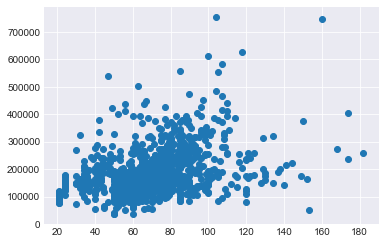

In [180]:
# Remove 2 apparent outliers

fig, ax=plt.subplots()
df_train1 = df_train.drop(df_train[(df_train['LotFrontage']>300) & (df_train['SalePrice']<300000)].index)
ax.scatter(x=df_train1['LotFrontage'],y=df_train1['SalePrice'])
plt.show()

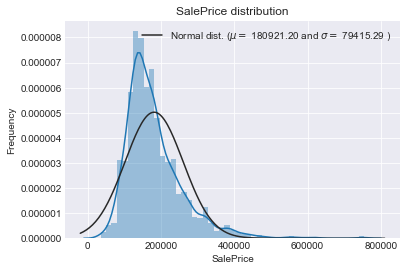

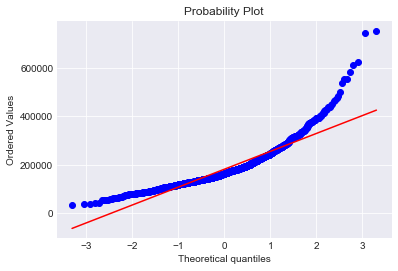

In [181]:
sns.distplot(df_train['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(df_train['SalePrice'])
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



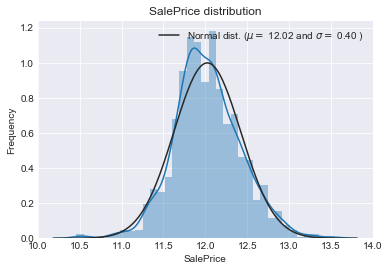

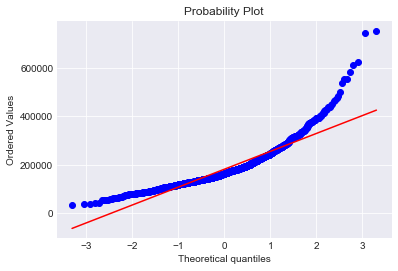

In [182]:
#Transform

df_train1['SalePrice']=np.log1p(df_train['SalePrice'])
sns.distplot(df_train1['SalePrice'] , fit=norm);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train1['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

## Concatenate
Concatenate and perform column datat ajustment

In [183]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train1.SalePrice.values
all_data = pd.concat((df_train1, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 80)


## Evaluate Missing Data

In [184]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
print(missing_data.shape)
missing_data.head(20)

(30, 1)


,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


Text(0.5,1,'Percent missing data by feature')

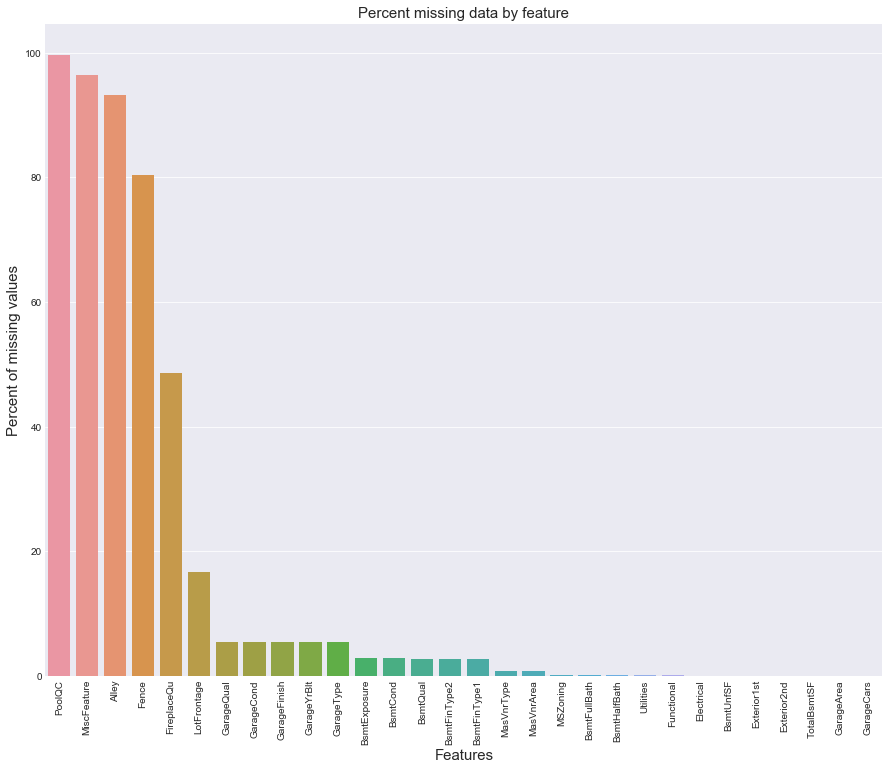

In [185]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'SalePrice']
['TotalBsmtSF', 'GrLivArea', 'YearBuilt', 'GarageCars', 'OverallQual']


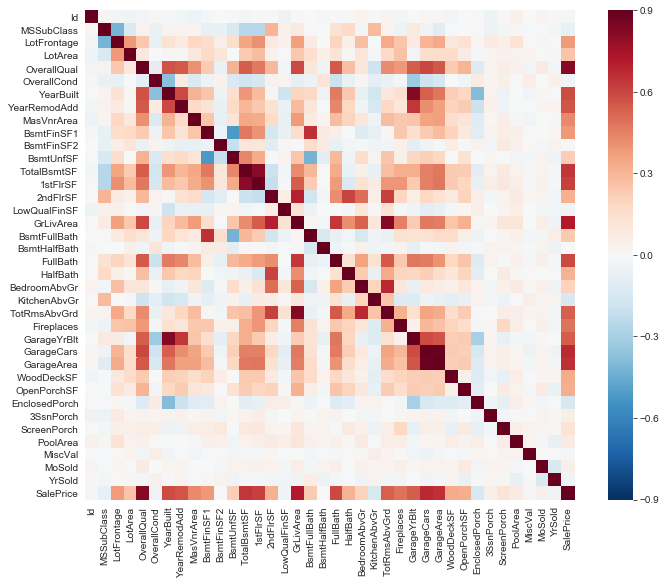

In [368]:
#Correlation map to see how features are correlated with SalePrice
corrmat = df_train1.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, vmin=-.9,square=True,cmap="RdBu_r")
# Select upper triangle of correlation matrix
upper = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.95
#to_drop = [column for column in upper.columns if any(upper[column].abs() > 0.8)]
to_drop=[]
cor_col=[]
for column in upper.columns:
    if any(upper[column].abs() > 0.8):
        to_drop.append(column)
        corcol=upper.index[upper[column].abs()>.8]
        cor_col.append(corcol.values[0])
print(to_drop)
print(cor_col)
#df.drop(df.columns[to_drop], axis=1)  # Drop if highenought
plt.show()

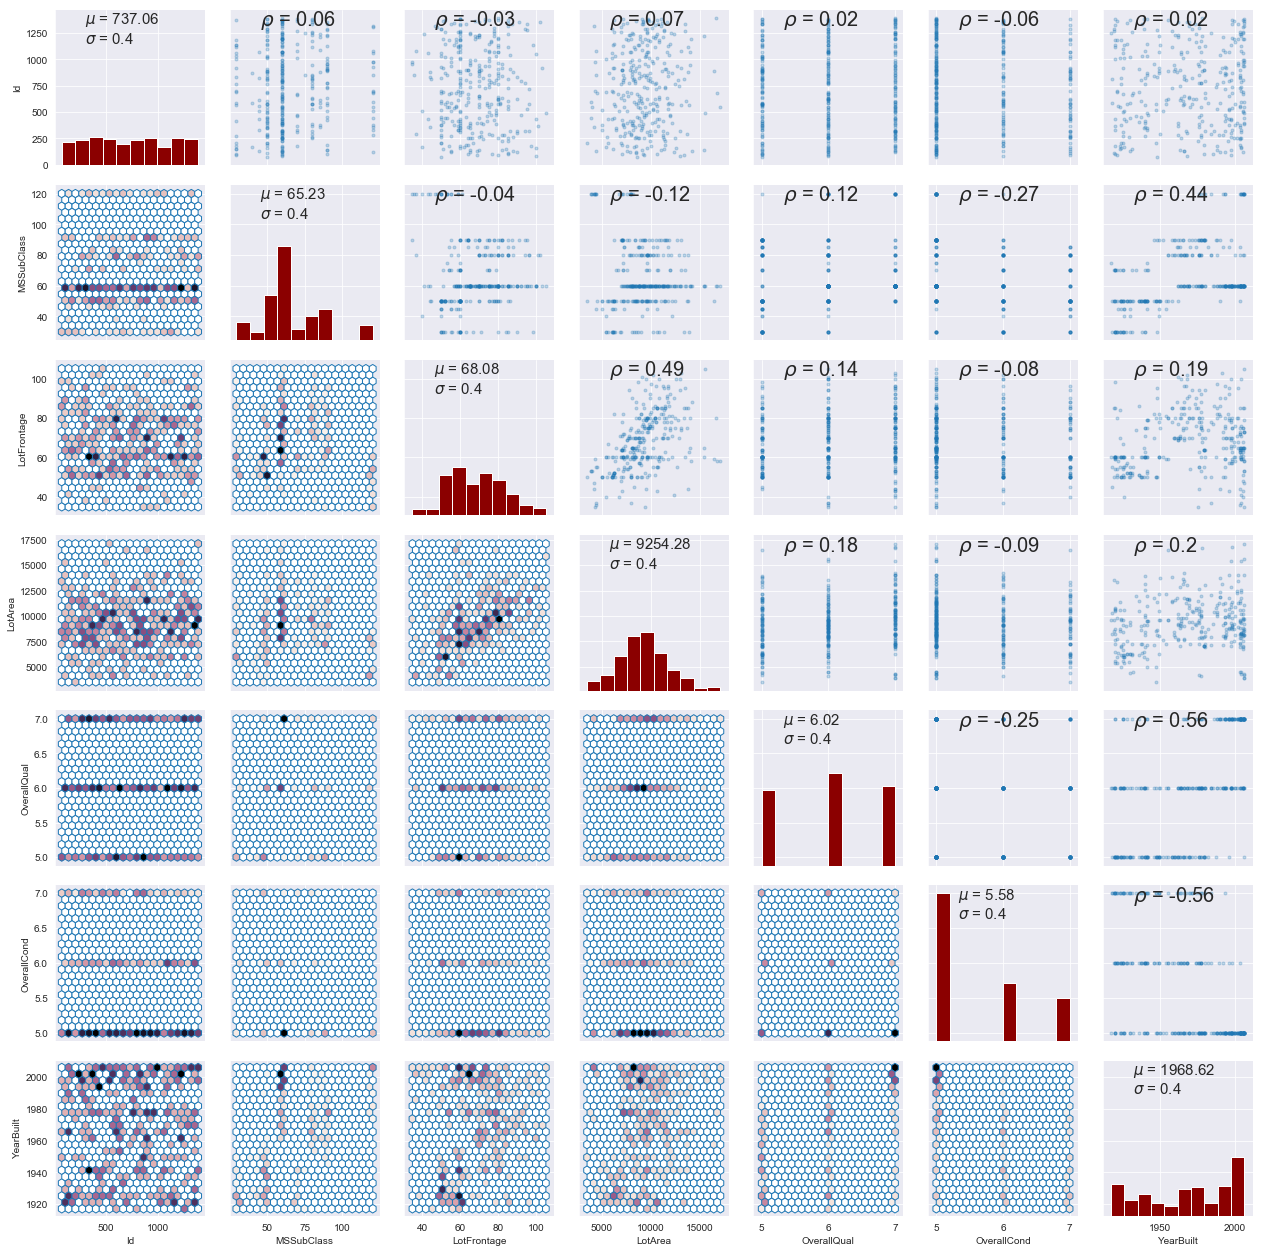

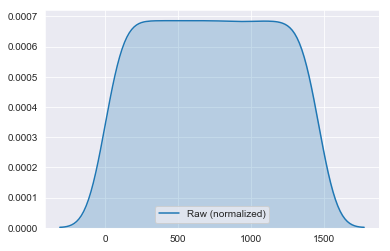

In [317]:

cpcols=df_train1.columns[:20]
df_cp=df_train1[cpcols]
                         

def core(df, α=.05):
    mask = (df > df.quantile(α)).all(1) & (df < df.quantile(1 - α)).all(1)
    return df[mask]
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=False)

def corr(x, y, **kwargs):
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.9), size = 20, xycoords = ax.transAxes)
def statsdisp(x, **kwargs):
    # Calculate the value
    mu = np.mean(x)
    signma= np.std(x)
    # Make the label
    label = r'$\mu$ = ' + str(round(mu, 2)) + '\n'+ r'$\sigma$ = ' + str(round(sigma, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.8), size = 15, xycoords = ax.transAxes)

(df_cp.select_dtypes(include=[np.number])
    .pipe(core)
    .pipe(sns.PairGrid)
    .map_upper(plt.scatter, marker='.', alpha=.25)
    .map_upper(corr)
    .map_diag(plt.hist,color='darkred')
    .map_diag(statsdisp)
#    .map_diag(stats.probplot)
    .map_lower(plt.hexbin, cmap=cmap, gridsize=20)
);
plt.show()
sns.kdeplot(df_cp[df_train1.columns[0]], shade=True, label="Raw (normalized)" );
plt.show()

## Fill Data for nones

In [187]:
#Replace by None - Based on Description
cols=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType','GarageFinish']
bcols=['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
gcols=['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
mcols=['MasVnrType','MSSubClass']
for col in cols+bcols+gcols+mcols:
    all_data[col]=all_data[col].fillna('None')
    
#Replace by 0 - Based on Descriptions
b0cols=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
g0cols=['GarageYrBlt', 'GarageArea', 'GarageCars']
m0cols=['MasVnrArea']
for col in b0cols+g0cols+m0cols:
    all_data[col]=all_data[col].fillna(0)

#Replace by Mode since high frequency
mmcols=['Functional','SaleType', 'KitchenQual','Exterior2nd','Exterior1st','Electrical','MSZoning']
for col in mmcols:
    all_data[col]=all_data[col].fillna(all_data[col].mode()[0])

#Replace by Median in Neiborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

#Knn is good in general but should be used with normalized data
#knn_impute(target=df['Age'], attributes=df.drop(['Age', 'PassengerId'], 1),
#                                    aggregation_method="median", k_neighbors=10, numeric_distance='euclidean',
#                                    categorical_distance='hamming', missing_neighbors_threshold=0.8)

#Utilities has information that is not Used
#all_data.drop(['Utilities'],axis=1)

In [188]:
import math
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
all_data_na_cols=all_data_na.index.tolist()
dl=[]
for col in all_data_na_cols:
    m=all_data[col].mode().iloc[0]
    mia=all_data_na[col]
    vc=math.trunc(all_data[col].value_counts().iloc[0]/len(all_data)*100)
    dl.append((col,mia,m,vc))
missing_data=pd.DataFrame(dl,columns=['Column','Missing Ratio','Mode','Percent'])
print("Shape :",missing_data.shape)
missing_data

Shape : (1, 4)


,Column,Missing Ratio,Mode,Percent
0,Utilities,0.068564,AllPub,99


In [190]:
#mode_data
missing_data['Column'].tolist()
missing_data

,Column,Missing Ratio,Mode,Percent
0,Utilities,0.068564,AllPub,99


## Converting Year Date into Datetime

,SalePrice,LogSalePrice
Date,,
2006-01-01,181000.0,12.106258
2006-01-01,136500.0,11.824087
2006-01-01,423000.0,12.955130
2006-01-01,205000.0,12.230770
2006-01-01,260000.0,12.468441


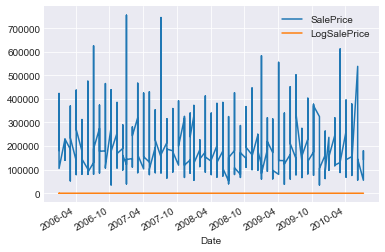

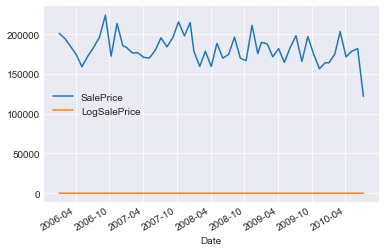

In [191]:
df = df_train[['YrSold','MoSold','SalePrice']]
df=df.astype(str)
df['Date']=pd.to_datetime(df['YrSold']+df['MoSold']+df['MoSold'],format="%Y%m%d")
df.set_index('Date',inplace=True)
df=df.drop(columns=['YrSold','MoSold'])
df=df.sort_index()
df['SalePrice']=df['SalePrice'].astype(float)
df['LogSalePrice']=np.log1p(df['SalePrice'])
df.plot()
filt=df.groupby(df.index).mean()
filt.plot()
df.head()

In [192]:
df['SalePrice']

Date
2006-01-01    181000.0
2006-01-01    136500.0
2006-01-01    423000.0
2006-01-01    205000.0
2006-01-01    260000.0
2006-01-01    145000.0
2006-01-01    228000.0
2006-01-01    155000.0
2006-01-01    172400.0
2006-01-01    105000.0
2006-02-02    229000.0
2006-02-02    179900.0
2006-02-02    220000.0
2006-02-02    230000.0
2006-02-02    173000.0
2006-02-02    192500.0
2006-02-02    154500.0
2006-02-02    140000.0
2006-02-02    230000.0
2006-03-03    186500.0
2006-03-03    118500.0
2006-03-03    171750.0
2006-03-03    140000.0
2006-03-03    183900.0
2006-03-03    320000.0
2006-03-03     52500.0
2006-03-03    167240.0
2006-03-03    217500.0
2006-03-03    162900.0
2006-03-03    143000.0
                ...   
2010-06-06    224000.0
2010-06-06    155000.0
2010-06-06     55993.0
2010-06-06     96500.0
2010-06-06    139000.0
2010-06-06    215200.0
2010-06-06    236000.0
2010-06-06    125500.0
2010-06-06    222000.0
2010-06-06    394432.0
2010-06-06     80000.0
2010-06-06     58500.0
2010-0

In [193]:
pd.pandas.to_datetime(all_data['YrSold'])

0      1970-01-01 00:00:00.000002008
1      1970-01-01 00:00:00.000002007
2      1970-01-01 00:00:00.000002008
3      1970-01-01 00:00:00.000002006
4      1970-01-01 00:00:00.000002008
5      1970-01-01 00:00:00.000002009
6      1970-01-01 00:00:00.000002007
7      1970-01-01 00:00:00.000002009
8      1970-01-01 00:00:00.000002008
9      1970-01-01 00:00:00.000002008
10     1970-01-01 00:00:00.000002008
11     1970-01-01 00:00:00.000002006
12     1970-01-01 00:00:00.000002008
13     1970-01-01 00:00:00.000002007
14     1970-01-01 00:00:00.000002008
15     1970-01-01 00:00:00.000002007
16     1970-01-01 00:00:00.000002010
17     1970-01-01 00:00:00.000002006
18     1970-01-01 00:00:00.000002008
19     1970-01-01 00:00:00.000002009
20     1970-01-01 00:00:00.000002006
21     1970-01-01 00:00:00.000002007
22     1970-01-01 00:00:00.000002008
23     1970-01-01 00:00:00.000002007
24     1970-01-01 00:00:00.000002010
25     1970-01-01 00:00:00.000002009
26     1970-01-01 00:00:00.000002010
2

## labele Encoding Categorical Values

In [194]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
all_data_trans=all_data.copy()
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data_trans[c] = lbl.transform(list(all_data[c].values))

# shape        
#print('Shape all_data: {}'.format(all_data_trns.shape))

In [248]:
#all_data_trans.info()

## Dealing with Skew in the data

In [196]:
#MSSubClass=The building class
all_data_trans['MSSubClass'] = all_data_trans['MSSubClass'].apply(str)
#Changing OverallCond into a categorical variable
all_data_trans['OverallCond'] = all_data_trans['OverallCond'].astype(str)
#Year and month sold are transformed into categorical features.
all_data_trans['YrSold'] = all_data_trans['YrSold'].astype(str)
all_data_trans['MoSold'] = all_data_trans['MoSold'].astype(str)

## Viewing data to determine skewnewss

C:\Users\ekambulow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ekambulow\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


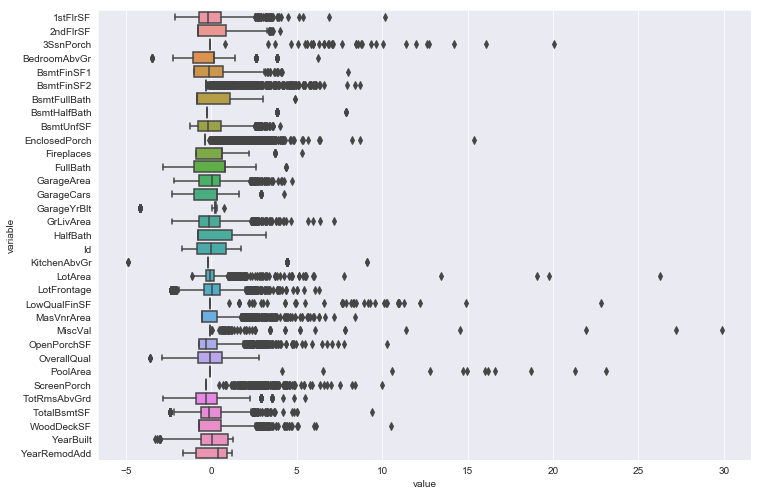

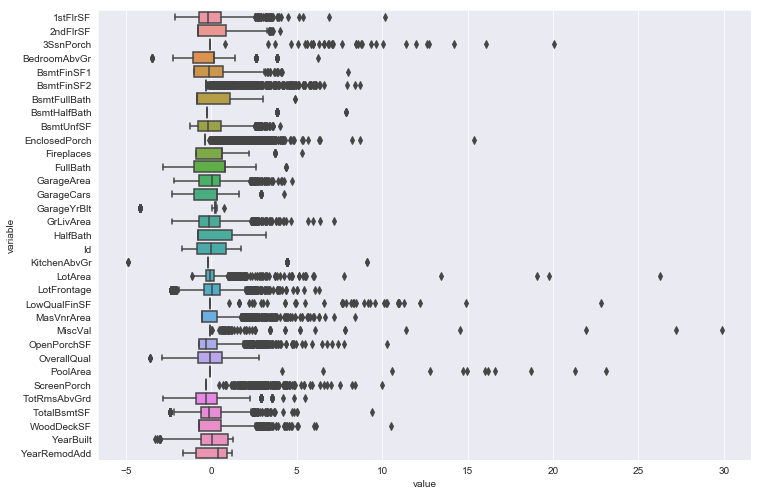

,variable,value
0,1stFlrSF,-0.781380
1,1stFlrSF,0.268879
2,1stFlrSF,-0.615822
3,1stFlrSF,-0.509761
4,1stFlrSF,-0.033782


In [257]:
#vp.drop('PoolArea',inplace=True)
from sklearn import preprocessing

numeric_feats = all_data_trans.dtypes[all_data.dtypes != "object"].index
pp=all_data[numeric_feats]
pp[numeric_feats] = preprocessing.scale(pp[numeric_feats])
vp=pp.melt()
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
#ax=sns.violinplot(data=vp,x='value',y='variable')
ax=sns.boxplot(data=vp,x='value',y='variable')
plt.show()
fig, ax = plt.subplots(figsize=a4_dims)
ax=sns.violinplot(data=vp,x='value',y='variable')
#ax=sns.boxplot(data=vp,x='value',y='variable')
plt.show()
vp.head()

In [254]:
numeric_feats = all_data_trans.dtypes[all_data.dtypes != "object"].index
all_data_trans.dtypes.value_counts()
# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.058210
LowQualFinSF,12.084539
3SsnPorch,11.372080
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101
BsmtHalfBath,3.929996


There are 33 skewed numerical features to Box Cox transform


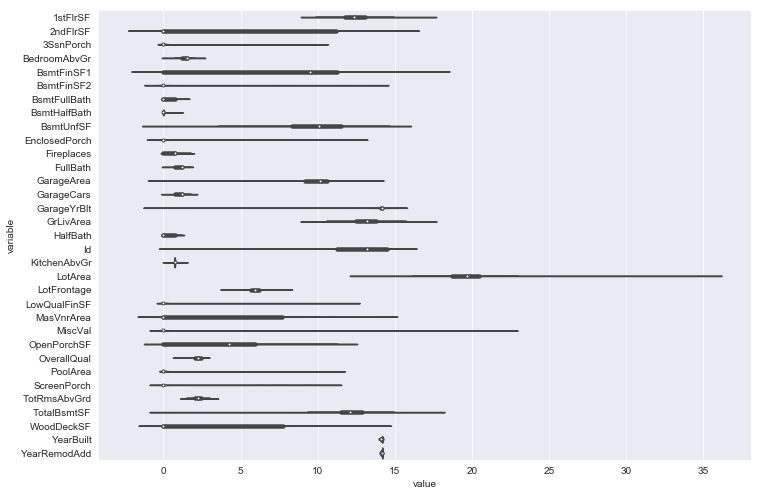

In [276]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data_trans[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])
vp=all_data_trans[numeric_feats].melt()
fig, ax = plt.subplots(figsize=a4_dims)
ax= sns.violinplot(data=vp,x='value',y='variable')
plt.show()





### Determing Correct lambda value

    Test name          Statistic      p-value
------------------ ------------------ -------
D’Agostino-Pearson  6065.099734137071     0.0
       Jarque-Bera 13106005.101120818     0.0
lambda = 3.6045
    Test name           Statistic           p-value      
------------------ ------------------- ------------------
D’Agostino-Pearson 0.19040013873192363 0.9091910150006726
       Jarque-Bera 0.07939676893482346 0.9610792718775469


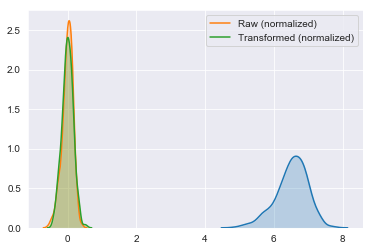

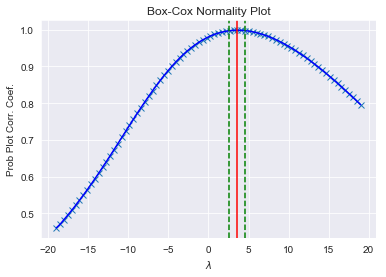

In [264]:
xt, maxlog, interval = stats.boxcox(x, alpha=0.05)
from astropy.table import Table
np.random.seed(1144) 
x = stats.loggamma.rvs(5, size=500) + 5
sns.kdeplot(x, shade=True);
 
def normtesttab(x):
    nm_value, nm_p = stats.normaltest(x)
    jb_value, jb_p = stats.jarque_bera(x)
    data_rows = [('D’Agostino-Pearson', nm_value, nm_p),
                 ('Jarque-Bera', jb_value, jb_p)]
    t = Table(rows=data_rows, names=('Test name', 'Statistic', 'p-value'), 
              meta={'name': 'normal test table'},
          dtype=('S25', 'f8', 'f8'))
    print(t)

normtesttab(all_data['PoolArea'])

xt, maxlog, interval = stats.boxcox(x, alpha=0.05)
print("lambda = {:g}".format(maxlog))

normtesttab(xt)

x1=x.reshape(500)
x1=(x1 - x1.mean()) / (x1.max() - x1.min())
 
xt1=xt.reshape(500)
xt1=(xt1 - xt1.mean()) / (xt1.max() - xt1.min())
 
sns.kdeplot(x1, shade=True, label="Raw (normalized)" );
sns.kdeplot(xt1, shade=True, label="Transformed (normalized)" );

fig = plt.figure()
ax = fig.add_subplot(111)
prob=stats.boxcox_normplot(x, -19, 19, plot=ax)
plt.plot(prob[0], prob[1], color='b')
ax.axvline(maxlog, color='r')
ax.axvline(interval[1], color='g', ls='--')
ax.axvline(interval[0], color='g',ls='--')
plt.show()

##  Reference Material

1.  Python datamaninpuation reference (https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/)
2.  (https://tomaugspurger.github.io/modern-7-timeseries)
3. Cheat cheat (https://www.analyticsvidhya.com/blog/2016/12/cheatsheet-scikit-learn-caret-package-for-python-r-respectively/)

In [217]:
sns.violinplot?

In [245]:
pp.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,-0.781380,1.207738,-0.103366,0.170459,0.598376,-0.293134,1.090257,-0.249810,-0.934371,-0.359740,...,-0.507009,0.648036,-0.060447,-0.286041,0.990854,-0.449699,-0.740619,1.046474,0.897669,0.157701
1,0.268879,-0.784893,-0.103366,0.170459,1.209088,-0.293134,-0.818675,3.821109,-0.629549,-0.359740,...,2.188517,-0.062077,-0.060447,-0.286041,-0.286636,0.492186,1.614800,0.155041,-0.394874,-0.602652
2,-0.615822,1.235737,-0.103366,0.170459,0.104418,-0.293134,1.090257,-0.249810,-0.288330,-0.359740,...,-0.507009,0.648036,-0.060447,-0.286041,-0.286636,-0.301225,-0.740619,0.980442,0.849797,0.157701
3,-0.509761,0.979075,-0.103366,0.170459,-0.501803,-0.293134,1.090257,-0.249810,-0.047201,3.873564,...,-0.507009,0.648036,-0.060447,-0.286041,0.352109,-0.681690,-0.740619,-1.858939,-0.682106,-1.363005
4,-0.033782,1.672063,-0.103366,1.386177,0.483868,-0.293134,1.090257,-0.249810,-0.160941,-0.359740,...,-0.507009,1.358149,-0.060447,-0.286041,1.629600,0.220756,0.776966,0.947426,0.754053,0.157701
